In [1]:
import pandas as pd
import numpy as np
import random


In [2]:
# Book pricing assumptions (UK averages)
PAPERBACK_PRICE = 10.99
HARDCOVER_PRICE = 22.99

# Bookstore wholesale costs (50% discount typical)
PAPERBACK_COST = PAPERBACK_PRICE * 0.5
HARDCOVER_COST = HARDCOVER_PRICE * 0.5

# Profit margin after operating expenses
NET_MARGIN = 0.06  # 6%

# Stores in England
NUM_STORES = 500

# Simulation time period
WEEKS = 52

# Customer age groups
AGE_GROUPS = ["Teen", "Young Adult", "Adult", "Middle Age", "Senior"]

# Customer gender
GENDER = ["Male", "Female"]


In [3]:
def generate_customer():
    
    age_weights = [0.10, 0.25, 0.30, 0.20, 0.15]
    
    age = random.choices(AGE_GROUPS, weights=age_weights)[0]
    
    gender = random.choice(GENDER)
    
    income = random.choice(["Low", "Medium", "High"])
    
    return age, gender, income


In [4]:
def generate_weekly_sales():
    
    paperback_sales = np.random.poisson(lam=25)
    
    hardcover_sales = np.random.poisson(lam=12)
    
    return paperback_sales, hardcover_sales


In [5]:
def calculate_profit(paperback_qty, hardcover_qty):
    
    paperback_revenue = paperback_qty * PAPERBACK_PRICE
    hardcover_revenue = hardcover_qty * HARDCOVER_PRICE
    
    paperback_cost = paperback_qty * PAPERBACK_COST
    hardcover_cost = hardcover_qty * HARDCOVER_COST
    
    gross_profit = (paperback_revenue - paperback_cost) + \
                   (hardcover_revenue - hardcover_cost)
    
    net_profit = gross_profit * NET_MARGIN
    
    return paperback_revenue, hardcover_revenue, net_profit


In [6]:
data = []

for store in range(NUM_STORES):
    
    for week in range(WEEKS):
        
        paperback_qty, hardcover_qty = generate_weekly_sales()
        
        p_rev, h_rev, profit = calculate_profit(paperback_qty, hardcover_qty)
        
        age, gender, income = generate_customer()
        
        data.append({
            
            "Store_ID": store,
            "Week": week,
            
            "Paperback_Sales": paperback_qty,
            "Hardcover_Sales": hardcover_qty,
            
            "Paperback_Revenue": p_rev,
            "Hardcover_Revenue": h_rev,
            
            "Profit": profit,
            
            "Customer_Age": age,
            "Customer_Gender": gender,
            "Customer_Income": income
            
        })


In [7]:
df = pd.DataFrame(data)

df.head()


,Store_ID,Week,Paperback_Sales,Hardcover_Sales,Paperback_Revenue,Hardcover_Revenue,Profit,Customer_Age,Customer_Gender,Customer_Income
0,0,0,28,15,307.72,344.85,19.5771,Adult,Female,Medium
1,0,1,21,18,230.79,413.82,19.3383,Young Adult,Male,High
2,0,2,31,13,340.69,298.87,19.1868,Adult,Male,Low
3,0,3,19,15,208.81,344.85,16.6098,Senior,Male,Medium
4,0,4,23,6,252.77,137.94,11.7213,Adult,Male,Low


In [8]:
weekly_profit = df.groupby("Week")["Profit"].sum()

weekly_profit


Week
0     8274.4539
1     8218.5636
2     8210.5845
3     8304.0468
4     8244.3819
5     8195.8944
6     8110.1400
7     8323.3959
8     8277.1398
9     8229.7287
10    8205.8727
11    8348.7684
12    8255.3241
13    8181.3414
14    8215.7247
15    8239.9140
16    8162.8371
17    8314.0626
18    8310.8601
19    8303.9436
20    8284.5252
21    8286.6744
22    8191.9626
23    8238.5361
24    8158.0980
25    8238.2850
26    8236.1178
27    8277.5142
28    8189.6301
29    8266.6125
30    8200.8666
31    8202.1659
32    8195.2278
33    8269.0647
34    8286.0612
35    8171.9223
36    8239.8873
37    8358.0771
38    8199.7743
39    8228.1321
40    8327.7123
41    8308.5414
42    8220.2301
43    8271.9072
44    8167.4349
45    8379.0531
46    8231.3664
47    8326.3668
48    8262.8682
49    8264.4669
50    8368.9623
51    8380.7766
Name: Profit, dtype: float64

In [9]:
yearly_profit = df["Profit"].sum()

print("Yearly profit across England bookstores: £", yearly_profit)


Yearly profit across England bookstores: £ 429155.79959999997


In [10]:
df["Paperback_Profit"] = (
    df["Paperback_Sales"] *
    (PAPERBACK_PRICE - PAPERBACK_COST) *
    NET_MARGIN
)

df["Hardcover_Profit"] = (
    df["Hardcover_Sales"] *
    (HARDCOVER_PRICE - HARDCOVER_COST) *
    NET_MARGIN
)

df[["Paperback_Profit","Hardcover_Profit"]].sum()


Paperback_Profit    214276.3161
Hardcover_Profit    214879.4835
dtype: float64

In [11]:
df["Customer_Age"].value_counts()


Customer_Age
Adult          7862
Young Adult    6475
Middle Age     5194
Senior         3859
Teen           2610
Name: count, dtype: int64

In [12]:
df["Customer_Gender"].value_counts()


Customer_Gender
Female    13029
Male      12971
Name: count, dtype: int64

In [13]:
df["Customer_Income"].value_counts()


Customer_Income
Low       8757
Medium    8662
High      8581
Name: count, dtype: int64

In [14]:
df["Company"] = np.where(
    df["Store_ID"] < NUM_STORES/2,
    "Chain",
    "Independent"
)


In [15]:
df.groupby("Company")["Profit"].sum()


Company
Chain          214435.8357
Independent    214719.9639
Name: Profit, dtype: float64

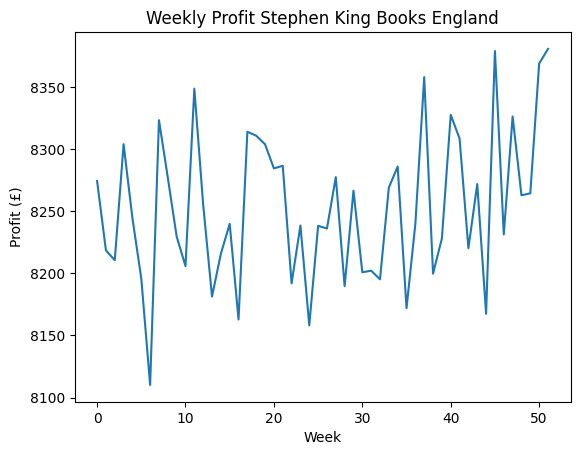

In [16]:
import matplotlib.pyplot as plt

weekly_profit.plot()

plt.title("Weekly Profit Stephen King Books England")

plt.ylabel("Profit (£)")

plt.show()


In [17]:
df.to_csv("stephen_king_england_bookstores_dataset.csv", index=False)
